# SyriaTel Customer Churn Prediction (Logistic Regression)

**Goal:** Predict whether a customer will churn so the business can target retention efforts early.

This notebook is structured to show the following:
1. Problem & success metric  
2. Data overview  
3. Pre‑processing & feature engineering  
4. Model training  
5. Evaluation & insights  
6. Recommendations / next steps

## 1) Business problem

Customer churn is expensive. If we can identify customers who are likely to churn, the retention team can:
- proactively reach out,
- offer incentives to high‑risk customers,
- prioritize interventions where they have the biggest impact.

### Success metric
Because churn is typically the minority class, **accuracy alone can be misleading**. We will report:
- Accuracy (overall correctness),
- Precision / Recall / F1 for the churn class,
- Confusion matrix (to see false positives vs false negatives).

## 2) Setup

Import the libraries used for loading, preparing, training, and evaluating the model.

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,ConfusionMatrixDisplay# for evaluation

## 3) Load dataset

We load the SyriaTel churn dataset and take a quick look at the first 5 rows.


In [2]:
df = pd.read_csv('./SyriaTel.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 4) Data overview

- `info()` helps confirm data types and missing values.
- `describe()` provides summary statistics for numeric features.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## 5) Define target and features

- **Target (`y`)**: `churn`  
- **Features (`X`)**: all other predictors.

We drop:
- identifiers (`state`, `phone number`) because they have no predictive value


In [6]:
X = df.drop(columns=['churn','state','phone number'])
y = df['churn']

## 6) Encode categorical features

Logistic Regression expects numeric inputs.  
We convert categorical fields (i.e, international plan and voice mail plan) to dummy variables and also dispaly the newly created columns

In [7]:
X = pd.get_dummies(X, drop_first=True)

X

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,True
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,True
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,True,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,True
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,False
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,False
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,True,False


## 7) Train/test split

We hold out **20%** of the data for testing.  
`stratify=y` keeps the churn rate similar in both train and test splits.

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

## 8) Feature scaling

Logistic Regression performs better when numeric features are on comparable scales.  
We fit the scaler on the training set and apply it to both train and test.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 9) Train baseline model (Logistic Regression)

We train a Logistic Regression model as a strong, interpretable baseline.


In [10]:
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 10) Predictions

We generate:
- class predictions (`0/1`)
- churn probabilities (useful for ranking customers by risk)

In [12]:
y_pred = model.predict(X_test)

y_pred_probability = model.predict_proba(X_test)[:, 1]

y_pred_probability

array([0.17521044, 0.0554957 , 0.08259311, 0.08444224, 0.34247173,
       0.04422201, 0.18943693, 0.09272729, 0.03910604, 0.0740642 ,
       0.01315001, 0.02800834, 0.26979202, 0.72184968, 0.02406975,
       0.17975481, 0.02761315, 0.02804832, 0.01141528, 0.13315647,
       0.10260377, 0.02331402, 0.01510034, 0.2489076 , 0.01227978,
       0.03877213, 0.0508871 , 0.67535655, 0.12714237, 0.00184434,
       0.08629569, 0.04325154, 0.0828722 , 0.02507748, 0.01069785,
       0.14374529, 0.00999345, 0.03856237, 0.06624895, 0.08078022,
       0.02561786, 0.19878807, 0.21002761, 0.06071819, 0.14095121,
       0.07928454, 0.06461699, 0.02891764, 0.1594256 , 0.0700336 ,
       0.10640883, 0.20467477, 0.038758  , 0.05079816, 0.1296934 ,
       0.27993674, 0.10721838, 0.07955105, 0.02192987, 0.51680896,
       0.02540896, 0.28223139, 0.07072262, 0.25233987, 0.23676448,
       0.2783306 , 0.03984022, 0.00415495, 0.13487802, 0.03587129,
       0.0411534 , 0.06931833, 0.78656527, 0.18837218, 0.02387

## 11) Evaluation

### Confusion matrix
- **True Positives (TP):** correctly predicted churners  
- **False Negatives (FN):** churners we missed  
- **False Positives (FP):** predicted churn but customer stayed 
- **True Negatives (TN):** correctly predicted non‑churners

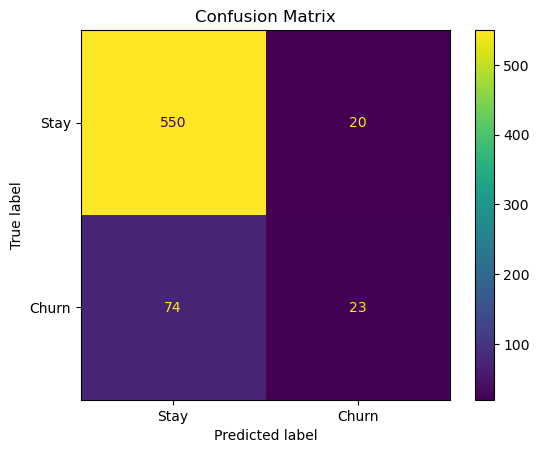

In [16]:
# Generate predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Stay", "Churn"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()


In [17]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8590704647676162

Confusion Matrix:
 [[550  20]
 [ 74  23]]

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.53      0.24      0.33        97

    accuracy                           0.86       667
   macro avg       0.71      0.60      0.62       667
weighted avg       0.83      0.86      0.84       667



## 12) Model Performance and interpretation


**1️⃣ Overall Accuracy: 85.9%**

The model correctly predicts 85.9% of all cases (573 out of 667).





**2️⃣ Confusion Matrix Breakdown**

|                  | Predicted False | Predicted True |
| ---------------- | --------------- | -------------- |
| **Actual False** | 550             | 20             |
| **Actual True**  | 74              | 23             |


**550** correctly predicted non-churn (True Negatives) - TN

**23** correctly predicted churn (True Positives) -TP

**20** false alarms (False Positives) - FP

**74** missed churn customers (False Negatives) -FN

**Critical Insight:**

_1.The model misses 74 out of 97 churn customers._

_2.That means it fails to detect 76% of actual churn cases._


**3️⃣ Precision, Recall & F1 Analysis
 For Non-Churn (False Class)**

Precision (TP / (TP + FP)): 0.88

Recall(TP / (TP + FN)): 0.96

F1-score 2 * (Precision * Recall) / (Precision + Recall): 0.92

**The model is very good at identifying customers who will stay.**

**3️⃣ Precision, Recall & F1 Analysis
 For Non-Churn (True Class)** 

Precision: 0.53

Recall: 0.24

F1-score: 0.33


Recall of 0.24 means the model detects only 24% of churn cases.

F1-score of 0.33 shows poor balance between precision and recall.